# 1.Data import

In [3]:
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.cloud.bigquery import Dataset

client = bigquery.Client()


In [4]:
QUERY = (
    """SELECT unique_client_id, 
    visitNumber, 
    channelgrouping, 
    device, 
    date, 
    transaction, 
    revenue    
     FROM `gap-bq-api-2016.attribution_modeling.13_step` 
     where unique_client_id in (select unique_client_id from `gap-bq-api-2016.attribution_modeling.13_step` 
     where visitNumber = 1)
     """)


In [5]:
projectid = "gap-bq-api-2016"
df = pd.read_gbq(QUERY, projectid, dialect='standard')

Requesting query... ok.
Job ID: job_j2lXzefmWplEy8edigfUv24v3oRR
Query running...
  Elapsed 15.62 s. Waiting...
  Elapsed 26.05 s. Waiting...
  Elapsed 36.49 s. Waiting...
  Elapsed 46.9 s. Waiting...
Query done.
Processed: 169.9 MB
Standard price: $0.00 USD

Retrieving results...
  Got page: 1; 3% done. Elapsed 54.09 s.
  Got page: 2; 7% done. Elapsed 59.15 s.
  Got page: 3; 10% done. Elapsed 63.85 s.
  Got page: 4; 13% done. Elapsed 69.55 s.
  Got page: 5; 17% done. Elapsed 74.52 s.
  Got page: 6; 20% done. Elapsed 79.65 s.
  Got page: 7; 23% done. Elapsed 84.63 s.
  Got page: 8; 27% done. Elapsed 89.43 s.
  Got page: 9; 30% done. Elapsed 94.97 s.
  Got page: 10; 33% done. Elapsed 100.04 s.
  Got page: 11; 37% done. Elapsed 105.63 s.
  Got page: 12; 40% done. Elapsed 110.76 s.
  Got page: 13; 43% done. Elapsed 115.69 s.
  Got page: 14; 47% done. Elapsed 121.37 s.
  Got page: 15; 50% done. Elapsed 126.25 s.
  Got page: 16; 53% done. Elapsed 131.1 s.
  Got page: 17; 57% done. Elapsed 1

In [6]:
df=df.sort_values(['transaction'], ascending=False)
df.head()

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue
1083227,870989493347657664,3,Email,desktop,20171124,4,224.76
1411978,441220690452921806,2,Email,desktop,20171105,4,146.52
215266,684179504259983926,6,Local Listing,desktop,20171111,3,123.51
1408878,2443716846814171522,2,Email,tablet,20171105,3,112.39
156084,5737746296563898804,1,Organic Search,desktop,20171106,3,845.63


In [7]:
df[df['transaction'] > 1]

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue
1083227,870989493347657664,3,Email,desktop,20171124,4,224.76
1411978,441220690452921806,2,Email,desktop,20171105,4,146.52
215266,684179504259983926,6,Local Listing,desktop,20171111,3,123.51
1408878,2443716846814171522,2,Email,tablet,20171105,3,112.39
156084,5737746296563898804,1,Organic Search,desktop,20171106,3,845.63
1423879,3369568219369670651,5,Email,desktop,20171106,3,250.47
1477951,4807362191617116113,1,Email,mobile,20171102,3,57.36
1433765,8601624923259048867,2,Email,desktop,20171106,3,144.23
763670,6486729069036024513,4,Direct,desktop,20171127,3,67.77
785461,6590481047817839826,1,Direct,tablet,20171130,3,57.42


# 2. Summary statistics 

In [8]:
# Libraries used
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
sns.violinplot(x="transaction", y="revenue", data=df)


In [ ]:
sns.distplot(df[df["transaction"] == 1]["revenue"])

In [ ]:
df.describe()

In [ ]:
df.std()

In [9]:
# par channel
pd.crosstab(df['transaction'], df['channelgrouping'], rownames=['transaction'])

channelgrouping,(Other),Affiliates,Direct,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social
transaction,,,,,,,,,,
0,22,9022,176100,221133,556609,12968,218700,244906,18388,27219
1,0,155,3471,659,3201,55,2266,2585,62,131
2,0,2,25,2,33,0,20,29,2,4
3,0,0,2,0,4,1,2,0,0,0
4,0,0,0,0,2,0,0,0,0,0


In [10]:
# par device
pd.crosstab(df['transaction'], df['device'], rownames=['transaction'])

device,desktop,mobile,tablet
transaction,,,
0,493812,687236,304019
1,7104,3024,2457
2,70,21,26
3,6,1,2
4,2,0,0


In [ ]:
df.hist()
pl.show()

In [11]:
df.groupby('transaction').mean()

,visitNumber,revenue
transaction,,
0,1.750526,0.000000
1,1.000000,116.457894
2,2.282051,101.915812
3,2.555556,197.737778
4,2.500000,185.640000


# 3. Preprocessing

## a. Replace missing values
http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna()

## b. Transaction distribution

In [12]:
df['transaction'].value_counts()

0    1485067
1      12585
2        117
3          9
4          2
Name: transaction, dtype: int64

In [ ]:
sns.countplot(x='transaction', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [13]:
a = ['2' , '3', '4']
df = df[~df['transaction'].isin(a)]

In [ ]:
sns.countplot(x='transaction', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

## b. Create new variables

In [14]:
# create new columns to compute days before conversion or not for survival analysis
df['date_min']=df.groupby(['unique_client_id'])['date'].transform(min)
df['date_max']=df['date'].max()
df['date_survie'] = np.where(df['transaction']==1, df['date'], df['date'].max())
df['datediff'] = df['date_survie'].astype(int) - df['date_min'].astype(int)
df.dtypes
df.head()


,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
683994,7876728804126515024,1,Display,mobile,20171115,1,64.27,20171115,20171130,20171115,0
811474,6494582670139698536,1,Direct,desktop,20171122,1,132.07,20171122,20171130,20171122,0
463884,4463537458140705697,1,Affiliates,mobile,20171130,1,88.72,20171130,20171130,20171130,0
1133638,6399326518922153723,1,Email,mobile,20171123,1,99.55,20171123,20171130,20171123,0
962176,5289644412884497520,1,Email,tablet,20171127,1,31.43,20171127,20171130,20171127,0


In [15]:
df=df.sort_values(['datediff'], ascending=False)
df.head()

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
1168789,339280393239140472,4,Email,mobile,20171121,0,0.0,20171101,20171130,20171130,29
536782,5656986106646375124,1,Referral,desktop,20171101,0,0.0,20171101,20171130,20171130,29
536908,7231341553367249029,1,Referral,desktop,20171101,0,0.0,20171101,20171130,20171130,29
536909,7255786046199850879,1,Referral,mobile,20171101,0,0.0,20171101,20171130,20171130,29
536910,7260947115125887351,2,Referral,desktop,20171101,0,0.0,20171101,20171130,20171130,29


In [16]:
df=df.sort_values(['visitNumber'], ascending=False)
df.head()

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
904238,4986027376522167690,94,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904237,4986027376522167690,93,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904236,4986027376522167690,92,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904235,4986027376522167690,91,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904234,4986027376522167690,90,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29


In [ ]:
customer_filter = ['4986027376522167690']
df[df.unique_client_id.isin(customer_filter)]

In [17]:
# create pivot on channel/device/transactions

df_trim_pt_channel = pd.pivot_table(df, index='unique_client_id', columns = 'channelgrouping', values = 'visitNumber', fill_value=0, aggfunc='count')
df_trim_pt_device = pd.pivot_table(df, index='unique_client_id', columns = 'device', values = 'visitNumber', fill_value=0, aggfunc='count')
df_trim_pt_transactions = pd.pivot_table(df, index='unique_client_id', values = ['transaction','revenue'], fill_value=0, aggfunc=np.sum)
df_trim_pt_date = pd.pivot_table(df, index='unique_client_id', values = 'datediff', fill_value=0, aggfunc=np.max)
df_trim_pt_visits = pd.pivot_table(df, index='unique_client_id', values = 'visitNumber', fill_value=0, aggfunc='count')

In [18]:
training = pd.concat([df_trim_pt_visits,df_trim_pt_channel,df_trim_pt_device,df_trim_pt_transactions,df_trim_pt_date], axis = 1) #concatenate pivot
training=training.sort_values(['visitNumber'], ascending=False)

training.head()

,visitNumber,(Other),Affiliates,Direct,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,mobile,tablet,revenue,transaction,datediff
unique_client_id,,,,,,,,,,,,,,,,,
4986027376522167690,96,0,0,0,0,95,0,0,0,1,0,0,0,96,0.0,0,29
9114323806561488965,83,0,0,10,0,22,0,51,0,0,0,0,83,0,0.0,0,28
4088039900651840070,80,0,0,0,0,0,0,80,0,0,0,80,0,0,0.0,0,29
6430065840376044779,79,0,0,58,21,0,0,0,0,0,0,79,0,0,0.0,0,27
7085191581585861209,72,0,0,0,0,0,0,72,0,0,0,72,0,0,0.0,0,22


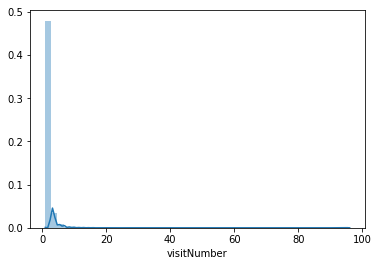

In [20]:
training.to_csv('training.csv', sep=',', encoding='utf-8', index=False) 
sns.distplot(training["visitNumber"])


#### On retire les observations ayant plus de 30 visites sur la période

In [22]:
training = training[training.visitNumber < 30]

In [54]:
from lifelines import KaplanMeierFitter
from lifelines.utils import datetimes_to_durations
#T = df['datediff'].astype('float64') 
E = df['transaction'].astype('int')
T,E = datetimes_to_durations(df['date_min'], df['date_survie'])
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label='Converted customers', left_censorship=True)


<lifelines.KaplanMeierFitter: fitted with 1497652 observations, 0 censored>

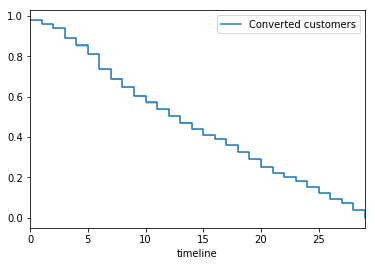

In [53]:
kmf.plot()

In [26]:
df

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
904238,4986027376522167690,94,Email,tablet,20171130,0,0.00,20171101,20171130,20171130,29
904237,4986027376522167690,93,Email,tablet,20171130,0,0.00,20171101,20171130,20171130,29
904236,4986027376522167690,92,Email,tablet,20171130,0,0.00,20171101,20171130,20171130,29
904235,4986027376522167690,91,Email,tablet,20171130,0,0.00,20171101,20171130,20171130,29
904234,4986027376522167690,90,Email,tablet,20171130,0,0.00,20171101,20171130,20171130,29
904233,4986027376522167690,89,Email,tablet,20171130,0,0.00,20171101,20171130,20171130,29
904232,4986027376522167690,88,Email,tablet,20171130,0,0.00,20171101,20171130,20171130,29
904231,4986027376522167690,87,Email,tablet,20171130,0,0.00,20171101,20171130,20171130,29
904230,4986027376522167690,86,Email,tablet,20171130,0,0.00,20171101,20171130,20171130,29
904229,4986027376522167690,85,Email,tablet,20171130,0,0.00,20171101,20171130,20171130,29


In [ ]:
sns.distplot(training["visitNumber"])

In [ ]:
training=training.sort_values(['datediff'], ascending=False)
training.head()

In [ ]:
customer_filter = ['8019998536456594134']
df[df.unique_client_id.isin(customer_filter)]

In [ ]:
training=training.sort_values(['revenue'], ascending=False)
training.head()

In [ ]:
customer_filter = ['17162961409513045']
df[df.unique_client_id.isin(customer_filter)]

In [ ]:
training=training.sort_values(['transaction'], ascending=False)
training.head()

In [ ]:
customer_filter = ['13065296289368069']
df[df.unique_client_id.isin(customer_filter)]

In [ ]:
# Extraction échantillon pour analyse externe
training2=training[:10000]
training2.to_csv('training_sample.csv',sep=',')

## Revalidate transaction distribution

In [ ]:
training['transaction'].value_counts()

In [ ]:
sns.countplot(x='transaction', data=training, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
a = ['2']
training = training[~training['transaction'].isin(a)]

In [ ]:
sns.countplot(x='transaction', data=training, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
training=training.sort_values(['transaction'], ascending=False)
training.head()

## c. Add intercept

In [ ]:
# Ajout du terme constant
training['intercept'] = 1.0
training.head()

## d. No standardization needed - only binary explicative variables

## e. Create training and testing sample
https://github.com/Einsteinish/bogotobogo-Machine-Learning/blob/master/scikit_machine_learning_Data_Processing-II-Datasets-Partitioning-Feature-scaling-Feature-Selection-Regularization.ipynb

# 4. Logistic Regression

#### Useful links 
Preprocessing
http://www.bogotobogo.com/python/scikit-learn/scikit-learn_logistic_regression.php
Étapes et viz
https://github.com/Mashimo/datascience/blob/master/01-Regression/LogisticRegressionSM.ipynb
Interpretation paramètres
https://www.r-bloggers.com/evaluating-logistic-regression-models/
Full process
http://blog.yhat.com/posts/logistic-regression-python-rodeo.html
Visuals
http://marcharper.codes/2016-06-27/Logistic+Regression.html
Other one
https://github.com/Mashimo/datascience/blob/master/01-Regression/LogisticRegressionSM.ipynb


## Preparation

### a. Import librairies

In [ ]:
#Import librairies
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### b. Drop irrelevant variables (uniqe_client_id / visitNumber / othes / direct / revenue / datediff)

In [ ]:
training_log = training.drop(['visitNumber', '(Other)', 'Direct', 'revenue', 'datediff'], 1)
training_log.head()

In [ ]:
training_log.dtypes

## Recursive feature elimination (RFE) model

In [ ]:
training_vars=training_log.columns.values.tolist()
y=['transaction']
X=[i for i in training_vars if i not in y]

In [ ]:
# Recursive feature elimination -> Select 'True'

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(training_log[X],training_log[y] )
print(rfe.support_)
print(rfe.ranking_)

## General model - Statsmodels

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(training_log[y],training_log[X])
result=logit_model.fit(maxiter=1000)
print(result.summary())

#### Inverse relationship between the probability of convering and the presence of several channels in the customer path

In other words, the probability of buying online is higher for visitors coming from Affiliates -> Paid Search -> Organic search -> Email -> Social -> Local Listing -> Referral -> Display 

In [ ]:
result.conf_int()

In [ ]:
params = result.params
conf = result.conf_int()
conf['Odds ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
print (np.exp(conf))


## Models with no interaction

### a. All explicative variables

In [ ]:
cols0=["Organic Search", "Paid Search", "Affiliates", "Referral", "Email", "Display", "Social", 
      "Local Listing", "Direct", "desktop", "mobile", "tablet"] 
X0=training_log[cols0]
y0=training_log['transaction']

#### sklearn

In [ ]:
# sampling
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1000.0, random_state=0)
logreg.fit(X_train, y_train)

In [ ]:
logi_regr = LogisticRegression(penalty='l1', C=0.1)
logi_regr.fit(X_train, y_train)
print('Training accuracy:', logi_regr.score(X_train, y_train))
print('Test accuracy:', logi_regr.score(X_test, y_test))

In [ ]:
logi_regr.intercept_

In [ ]:
logi_regr.coef_

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### statsmodels

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit(maxiter=1000)
print(result.summary())

In [ ]:
result.conf_int()

In [ ]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

### b. All channels

#### Statsmodel

In [ ]:
cols1=["Organic Search", "Paid Search", "Affiliates", "Referral", "Email", "Display", "Social", 
      "Local Listing"] 
X1=training_log[cols1]
y1=training_log['transaction']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,X1)
result=logit_model.fit(maxiter=1000)
print(result.summary())

In [ ]:
result.conf_int()

In [ ]:
params = result.params
conf = result.conf_int()
conf['Odds ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
print (np.exp(conf))

#### Sklearn

In [ ]:
# sampling
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1000.0, random_state=0)
logreg.fit(X_train, y_train)

In [ ]:
logi_regr = LogisticRegression(penalty='l1', C=0.1)
logi_regr.fit(X_train, y_train)
print('Training accuracy:', logi_regr.score(X_train, y_train))
print('Test accuracy:', logi_regr.score(X_test, y_test))

In [ ]:
logi_regr.intercept_

In [ ]:
logi_regr.coef_

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Interaction terms

In [ ]:
# Création de toutes les variables d'interaction
training_log['Email x Paid Search']=training_log['Email'] * training_log['Paid Search']
training_log['Email x Organic Search']=training_log['Email'] * training_log['Organic Search']
training_log['Email x Display']=training_log['Email'] * training_log['Display']
training_log['Email x Social']=training_log['Email'] * training_log['Social']
training_log['Email x Referral']=training_log['Email'] * training_log['Referral']
training_log['Email x Local Listing']=training_log['Email'] * training_log['Local Listing']
training_log['Email x Affiliates']=training_log['Email'] * training_log['Affiliates']
training_log['Paid Search x Organic Search']=training_log['Paid Search'] * training_log['Organic Search']
training_log['Paid Search x Display']=training_log['Paid Search'] * training_log['Display']
training_log['Paid Search x Social']=training_log['Paid Search'] * training_log['Social']
training_log['Paid Search x Referral']=training_log['Paid Search'] * training_log['Referral']
training_log['Paid Search x Local Listing']=training_log['Paid Search'] * training_log['Local Listing']
training_log['Paid Search x Affiliates']=training_log['Paid Search'] * training_log['Affiliates']
training_log['Organic Search x Display']=training_log['Organic Search'] * training_log['Display']
training_log['Organic Search x Social']=training_log['Organic Search'] * training_log['Social']
training_log['Organic Search x Referral']=training_log['Organic Search'] * training_log['Referral']
training_log['Organic Search x Local Listing']=training_log['Organic Search'] * training_log['Local Listing']
training_log['Organic Search x Affiliates']=training_log['Organic Search'] * training_log['Affiliates']
training_log['Display x Social']=training_log['Display'] * training_log['Social']
training_log['Display x Referral']=training_log['Display'] * training_log['Referral']
training_log['Display x Local Listing']=training_log['Display'] * training_log['Local Listing']
training_log['Display x Affiliates']=training_log['Display'] * training_log['Affiliates']
training_log['Social x Referral']=training_log['Social'] * training_log['Referral']
training_log['Social x Local Listing']=training_log['Social'] * training_log['Local Listing']
training_log['Social x Affiliates']=training_log['Social'] * training_log['Affiliates']
training_log['Referral x Local Listing']=training_log['Referral'] * training_log['Local Listing']
training_log['Referral x Affiliates']=training_log['Referral'] * training_log['Affiliates']
training_log['Local Listing x Affiliates']=training_log['Local Listing'] * training_log['Affiliates']
training_log['Email x desktop']=training_log['Email'] * training_log['desktop']
training_log['Email x tablet']=training_log['Email'] * training_log['tablet']
training_log['Email x mobile']=training_log['Email'] * training_log['mobile']
training_log['Paid Search x desktop']=training_log['Paid Search'] * training_log['desktop']
training_log['Paid Search x tablet']=training_log['Paid Search'] * training_log['tablet']
training_log['Paid Search x mobile']=training_log['Paid Search'] * training_log['mobile']
training_log['Organic Search x desktop']=training_log['Organic Search'] * training_log['desktop']
training_log['Organic Search x tablet']=training_log['Organic Search'] * training_log['tablet']
training_log['Organic Search x mobile']=training_log['Organic Search'] * training_log['mobile']
training_log['Display x desktop']=training_log['Display'] * training_log['desktop']
training_log['Display x tablet']=training_log['Display'] * training_log['tablet']
training_log['Display x mobile']=training_log['Display'] * training_log['mobile']
training_log['Social x desktop']=training_log['Social'] * training_log['desktop']
training_log['Social x tablet']=training_log['Social'] * training_log['tablet']
training_log['Social x mobile']=training_log['Social'] * training_log['mobile']
training_log['Referral x desktop']=training_log['Referral'] * training_log['desktop']
training_log['Referral x tablet']=training_log['Referral'] * training_log['tablet']
training_log['Referral x mobile']=training_log['Referral'] * training_log['mobile']
training_log['Local Listing x desktop']=training_log['Local Listing'] * training_log['desktop']
training_log['Local Listing x tablet']=training_log['Local Listing'] * training_log['tablet']
training_log['Local Listing x mobile']=training_log['Local Listing'] * training_log['mobile']
training_log['Affiliates x desktop']=training_log['Affiliates'] * training_log['desktop']
training_log['Affiliates x tablet']=training_log['Affiliates'] * training_log['tablet']
training_log['Affiliates x mobile']=training_log['Affiliates'] * training_log['mobile']


### All channels w/ paid interactions

In [ ]:
cols8=["Organic Search", "Paid Search", "Affiliates", "Referral", "Email", "Display", "Social", 
      "Local Listing","Email x Paid Search","Email x Display","Email x Affiliates","Paid Search x Display",
       "Paid Search x Affiliates","Organic Search x Display","Organic Search x Affiliates","Display x Affiliates",
       "Paid Search x Display","Paid Search x Social","Paid Search x Referral","Paid Search x Local Listing",
       "Paid Search x Affiliates","Display x Social","Display x Referral","Display x Local Listing",
       "Display x Affiliates","Social x Affiliates","Referral x Affiliates","Local Listing x Affiliates"] 
X8=training_log[cols8]
y8=training_log['transaction']

### RFS

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
rfe = RFE(logreg, 18)
rfe = rfe.fit(training_log[X8],training_log[y8] )
print(rfe.support_)
print(rfe.ranking_)

### Statsmodel

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(training_log[y8],training_log[X8])
result=logit_model.fit(maxiter=1000)
print(result.summary())


In [ ]:
result.conf_int()

In [ ]:
params = result.params
conf = result.conf_int()
conf['Odds ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
print (np.exp(conf))

### Sklearn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X8, y8, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1000.0, random_state=0)
logreg.fit(X_train, y_train)

In [ ]:
logi_regr = LogisticRegression(penalty='l1', C=0.1)
logi_regr.fit(X_train, y_train)
print('Training accuracy:', logi_regr.score(X_train, y_train))
print('Test accuracy:', logi_regr.score(X_test, y_test))


In [ ]:
logi_regr.intercept_

In [ ]:
logi_regr.coef_


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Linear regression (all + conversion only)

tutos: http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
full process & coefficients: http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/

In [ ]:
training.head()

In [ ]:
# On retire les non conversions
training_lin = training[training.transaction == 1]

In [ ]:
# On retire les colonnes inutiles
training_lin = training_lin.drop(['(Other)', 'Direct', 'transaction', 'datediff'], 1)

training_lin.head()

In [ ]:
training_lin=training_lin.sort_values(['revenue'], ascending=True)
training_lin.head()
# in case i need to convert: training_lin['revenue'] = training_lin[['revenue']].astype(int)

### statsmodels - sur les conversions uniquement

In [ ]:
X = training_lin[["visitNumber", "Affiliates", "Display", "Email", "Local Listing", "Organic Search", "Paid Search",
                 "Referral", "Social", "desktop", "mobile", "tablet"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin[["Affiliates", "Display", "Email", "Local Listing", "Organic Search", "Paid Search",
                 "Referral", "Social"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin[["desktop", "mobile", "tablet"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin[["Affiliates", "Email", "Organic Search", "Paid Search"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin[["Local Listing", "Organic Search", "Paid Search"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin[["Affiliates", "Display", "Paid Search"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

### avec toutes les observations

In [ ]:
# On retire les colonnes inutiles
training_lin2 = training.drop(['(Other)', 'Direct', 'transaction', 'datediff'], 1)

training_lin2.head()

In [ ]:
X = training_lin2[["visitNumber", "Affiliates", "Display", "Email", "Local Listing", "Organic Search", "Paid Search",
                 "Referral", "Social", "desktop", "mobile", "tablet"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin2["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin2[["Affiliates", "Display", "Email", "Local Listing", "Organic Search", "Paid Search",
                 "Referral", "Social"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin2["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin2[["desktop", "mobile", "tablet"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin2["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

### sklearn

# Survival Analysis

In [ ]:
## Survival analysis

from sksurv.datasets import load_veterans_lung_cancer

data_x, data_y = load_veterans_lung_cancer()
data_y

# Markov Chains [R integration to validate]

In [ ]:
#Markov chains
QUERYMKV = (
    """SELECT unique_client_id, 
    visitNumber, 
    channelgrouping, 
    device, 
    date, 
    transaction, 
    revenue,
    revenue_ind
     FROM `gap-bq-api-2016.attribution_modeling.markov_view` 
     where unique_client_id in (select unique_client_id from `gap-bq-api-2016.attribution_modeling.13_step` 
     where visitNumber = 1)
     """)

projectid = "gap-bq-api-2016"
mkv_df = pd.read_gbq(QUERYMKV, projectid, dialect='standard')
df = mkv_df
idx_client = mkv_df['unique_client_id'].drop_duplicates() 
df['cnt_key'] = mkv_df.groupby(['unique_client_id'])['unique_client_id'].transform('count')
mkv_df = pd.DataFrame(columns = ['unique_client_id', 'path', 'device', 'revenue', 'revInd'], index=idx_client)
chn_grp = ''
dev_grp = ''
ant_kid = ''
idx = 0
for index, row in df.iterrows():
    if idx == row['cnt_key'] and idx == 1:
            mkv_df = mkv_df.append({'unique_client_id' : row['unique_client_id'],
            'path' : row['channelgrouping'], 
            'device' : row['device'], 
            'revenue' : row['revenue'],                        
            'revInd' : row['revenue_ind']}, ignore_index=True)
            idx = idx-1
    elif idx > 1:
        if row['revenue_ind'] == 0:
            if chn_grp == '' and dev_grp == '':
                dev_grp = row['device']
                chn_grp = row['channelgrouping']
                idx = idx-1
            elif chn_grp == '':
                chn_grp = row['channelgrouping']
                idx = idx-1
            elif dev_grp == '':
                dev_grp = row['device']
                idx = idx-1
            elif chn_grp != '' and dev_grp != '':
                chn_grp = chn_grp + ' > ' + row['channelgrouping']
                dev_grp = dev_grp + ' > ' + row['device']
                idx = idx-1
            
        elif row['revenue_ind'] == 1:
            chn_grp = chn_grp + ' > ' + row['channelgrouping']
            dev_grp = dev_grp + ' > ' + row['device']
            mkv_df = mkv_df.append({'unique_client_id' : row['unique_client_id'],
            'path' : chn_grp, 
            'device' : dev_grp, 
            'revenue' : row['revenue'],   
            'revInd' : row['revenue_ind']}, ignore_index=True)
            chn_grp = ''
            dev_grp = ''
            idx = idx-1    
    elif idx == 1:
        mkv_df = mkv_df.append({'unique_client_id' : row['unique_client_id'],
        'path' : chn_grp, 
        'device' : dev_grp, 
        'revInd' : row['revenue_ind']}, ignore_index=True)
        chn_grp = ''
        dev_grp = ''
        idx = idx-1
    elif idx == 0:
        idx = row['cnt_key']
        ant_kid = row['unique_client_id']
    
        if row['revenue_ind'] == 0:
            if chn_grp == '' and dev_grp == '':
                dev_grp = row['device']
                chn_grp = row['channelgrouping']
                idx = idx-1
            elif chn_grp == '':
                chn_grp = row['channelgrouping']
                idx = idx-1
            elif dev_grp == '':
                dev_grp = row['device']
                idx = idx-1
            elif chn_grp != '' and dev_grp != '':
                chn_grp = chn_grp + ' > ' + row['channelgrouping']
                dev_grp = dev_grp + ' > ' + row['device']
                idx = idx-1
            
        elif row['revenue_ind'] == 1:
            chn_grp = str(chn_grp + ' > ' + row['channelgrouping'])
            dev_grp = dev_grp + ' > ' + row['device']
            mkv_df = mkv_df.append({'unique_client_id' : row['unique_client_id'],
            'path' : chn_grp, 
            'device' : dev_grp, 
            'revenue' : row['revenue'],   
            'revInd' : row['revenue_ind']}, ignore_index=True)
            chn_grp = ''
            dev_grp = ''
            idx = idx-1
mkv_df['path'] = mkv_df['path'].str.replace("Direct", "").str.replace("Others", "").str.replace(">  >", ">").str.replace('> ', "")
mkv_df['device'] = mkv_df['device'].str.replace('> ', "")

mkv_df = mkv_df.drop_duplicates()
mkv_df = mkv_df.fillna(0)

In [ ]:
## Linear regression model - Train and build 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Calculate R-Square
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

# Compute Root square mean error (RSME)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

# Compute absolute MAE
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)